## Dependencies

### Library Installation (if needed)

In [1]:
#! pip install -qUr requirements.txt

In [ ]:
from methods.screener_methods import *
from tqdm import tqdm
import pandas as pd

### Single import

,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,P/E Score,ROA Score,PB Score,Leadership Score,Insider Buy Score,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,Sector,Industry,Country,Owned
0,NOVO-B.CO,Novo Nordisk B A/S,Buy,1.58,1.43,0.14,0.63,1.0,-0.2,0.14,0.0,13.22,21.11,23.33,8.07,0.0,Healthcare,Drug Manufacturers - General,Denmark,True


/home/victorvj/Documents/stock_predictor/scripts/methods/screener_methods.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price = yf.download(self.symbol, period=range, rounding=False, progress=False)[('Close', self.symbol)]


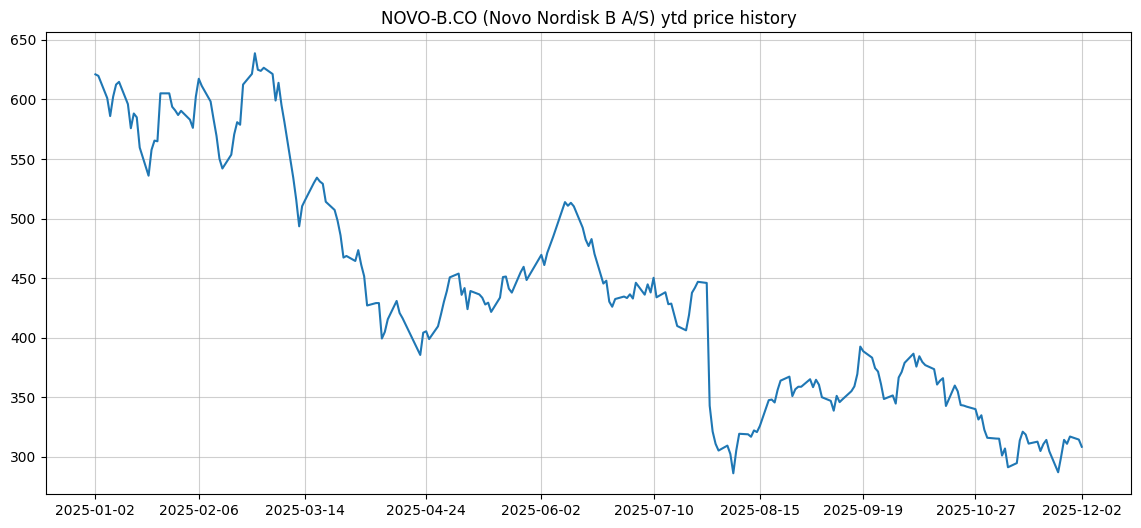

In [7]:
symbol = "NOVO-B.CO"
stock = Stock(symbol)
display(stock.summary())
stock.price_graph()


### Screener

In [4]:
symbol_list = input('Symbols eg. "simple", "filtered", "all", "danish":')

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [5]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Recommendation Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

100%|██████████| 68/68 [01:12<00:00,  1.06s/it]


,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,P/E Score,ROA Score,PB Score,Leadership Score,Insider Buy Score,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,Sector,Industry,Country,Owned
0,BAVA.CO,Bavarian Nordic A/S,Buy,2.49,2.09,0.40,1.04,0.92,0.12,0.40,0.0,6.30,7.78,30.70,1.15,0.0,Healthcare,Biotechnology,Denmark,False
0,ZEAL.CO,Zealand Pharma A/S,Buy,2.02,1.99,0.03,1.07,1.00,-0.08,0.03,0.0,5.39,33.45,91.28,2.28,0.0,Healthcare,Biotechnology,Denmark,True
0,HLUN-A.CO,H. Lundbeck A/S A,Buy,1.99,1.98,0.01,0.93,0.95,0.09,0.01,0.0,8.98,8.28,3.84,1.36,0.0,Healthcare,Drug Manufacturers - Specialty & Generic,Denmark,True
0,TRMD,TORM plc,Buy,1.95,1.78,0.17,0.99,0.65,0.15,0.17,0.0,7.67,5.99,2.73,0.95,0.0,Energy,Oil & Gas Midstream,United Kingdom,True
0,GUBRA.CO,Gubra A/S,Buy,1.90,1.89,0.01,1.09,1.00,-0.20,0.01,0.0,4.47,78.15,106.12,6.38,0.0,Healthcare,Biotechnology,Denmark,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,ALMB.CO,Alm. Brand A/S,Sell,-0.97,-1.18,0.21,-0.78,-0.33,-0.07,0.21,0.0,25.93,3.57,0.70,2.23,0.0,Financial Services,Insurance - Diversified,Denmark,False
0,SAAB-B.ST,SAAB AB ser. B,Sell,-1.35,-1.55,0.20,-1.20,-0.16,-0.20,0.20,0.0,48.61,3.99,9.63,6.15,0.0,Industrials,Aerospace & Defense,Sweden,False
0,SOLAR-B.CO,Solar B A/S,Sell,-1.57,-1.80,0.23,-1.20,-0.76,0.16,0.23,0.0,54.11,2.15,3.53,0.81,0.0,Technology,Electronics & Computer Distribution,Denmark,False
0,NRDF.CO,Nordfyns Bank A/S,Sell,-1.78,-2.02,0.24,-1.16,-0.95,0.09,0.24,0.0,37.91,0.42,16.09,1.42,0.0,Financial Services,Banks - Regional,Denmark,False
